# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andrew Jonatan Damanik
- **Email:** andrewdamanik23@gmail.com
- **ID Dicoding:** drewjd27

## Tentang Dataset

Bike Sharing Dataset ini adalah data mengenai penyewaan sepeda tahun selama dua tahun, yaitu 2011 dan 2012. Terdapat dua file csv pada dataset ini, yaitu day.csv yang mencatat penyewaan sepeda per hari, dan hour.csv yang mencatat penyewaan sepeda per jam.

#### Karakteristik Dataset

Pada hour.csv dan day.csv dapat dilihat bahwa keduanya memiliki field yang sama, kecuali pada day.csv tidak terdapat field "hr". Berikut ini adalah keterangan dari field-field tersebut.
- instant: record index
- dtday: tanggal
- season: musim (1:musim dingin, 2:musim semi, 3:musim panas, 4:musim gugur)
- yr: tahun (0: 2011, 1:2012)
- mtnh: bulan (1 - 12)
- hr: jam (0 - 23)
- holiday : Apakah hari libur atau tidak (0 adalah tidak libur, 1 adalah libur)
- weekday: hari pada tiap pekan (0 sampai 6)
- workingsday: jika hari tersebut bukan hari libur ataupun akhir pekan adalah 1, jika tidak maka 0
- weathersit:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperatur (celcius) yang dinormalisasi. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: dugaan temperatur (celcius) yang dinormalisasi. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Kelembapan yang dinormalisasi. Nilainya dibagi 100 (max)
- windspeed: Kecepatan angin yang dinormalisasi. Nilainya dibagi ke 67 (max)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna yang sudah mendaftar
- cnt: jumlah total dari sepeda yang disewa termasuk kasual dan terdaftar.

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda setiap musimnya?
- Bagaimana penyewaan sepeda setiap bulannya?
- Bagaimana penyewaasn sepeda setiap jamnya?
- Bagaimana penyewaan sepeda setiap harinya?
- Bagaimana pengaruh hari kerja terhadap penyewaan sepeda?
- Bagaimana pengaruh hari libur terhadap penyewaan sepeda?

## Import Packages/Library yang Digunakan

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

Menampilkan 5 baris pertama dari hour.csv

In [100]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Menampilkan 5 data dari day.csv

In [101]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Cek day_df

In [102]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kemudian pada type data pada field dteday harusnya adalah bertipe datetime

In [103]:
print("Total duplicates: ", day_df.duplicated().sum())

Total duplicates:  0


Tidak ada data duplikat pada day_df

In [104]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang hilang pada day_df

In [105]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Cek hour_df

In [106]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data pada field dteday harusnya adalah bertipe datetime

In [107]:
print("Total duplicates: ", hour_df.duplicated().sum())

Total duplicates:  0


Tidak terdapat data duplikat pada hour_df

In [108]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang hilang pada hour_df

In [109]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Insight dari Assessment

- day_df dan hour_df memiliki field yang sama, kecuali "hr" yang mencatat waktu jam sepeda disewa pada hour_df.
- Untuk field season, yr, mnth, hr, holiday, weekday, dan weathersit harusnya adalah data dengan tipe kategorikal untuk pemahaman dan analisis yang lebih baik.
- Tipe data dteday pada hour_df dan day_df adalah object. Seharusnya tipe data yang tepat adalah datetime.
- Tidak ada data duplikat dan data kosong pada day_df dan hour_df

### Cleaning Data

#### hour_df

Mengubah tipe data object pada field dteday menjadi datetime

In [110]:
datetime_columns_hour_df = ["dteday"]

for column in datetime_columns_hour_df:
  hour_df[column] = pd.to_datetime(hour_df[column])

Mengubah tipe data pada field mnth dan weather menjadi category

In [111]:
category_columns_hour_df = ['mnth', 'weathersit']

hour_df[category_columns_hour_df] = hour_df[category_columns_hour_df].astype('category')

Mengubah nilai dan tipe data pada field season, yr, holiday, weekday, workingday

In [112]:
# Dictionary mapping untuk setiap kolom
mappings_hour_df = {
    'season': {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'},
    'yr': {0:2011, 1:2012},
    'holiday': {0:'Not Holiday', 1:'Holiday'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday': {0:'Not Workingday', 1:'Workingday'}
}

# Mengubah nilai dan tipe data untuk setiap kolom
for col, mapping in mappings_hour_df.items():
    hour_df[col] = hour_df[col].map(mapping).astype('category')

# Menampilkan hasil
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,Not Holiday,Saturday,Not Workingday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,Not Holiday,Saturday,Not Workingday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.75,0.0,0,1,1


In [113]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### day_df

Mengubah tipe data object pada field dteday menjadi datetime

In [114]:
datetime_columns_day_csv = ["dteday"]

for column in datetime_columns_day_csv:
  day_df[column] = pd.to_datetime(day_df[column])

Mengubah tipe data pada field mnth dan weather menjadi category

In [115]:
category_columns_hour_df = ['mnth', 'weathersit']

day_df[category_columns_hour_df] = day_df[category_columns_hour_df].astype('category')

Mengubah nilai dan tipe data pada field season, yr, holiday, weekday, workingday

In [116]:
# Dictionary mapping untuk setiap kolom
mappings_day_df = {
    'season': {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'},
    'yr': {0:2011, 1:2012},
    'holiday': {0:'Not Holiday', 1:'Holiday'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday': {0:'Not Workingday', 1:'Workingday'}
}

# Mengubah nilai dan tipe data untuk setiap kolom
for col, mapping in mappings_day_df.items():
    day_df[col] = day_df[col].map(mapping).astype('category')

# Menampilkan hasil
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,Not Holiday,Saturday,Not Workingday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,1,Not Holiday,Sunday,Not Workingday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,1,Not Holiday,Monday,Workingday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,1,Not Holiday,Tuesday,Workingday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,1,Not Holiday,Wednesday,Workingday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [117]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [118]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,Not Holiday,Saturday,Not Workingday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,1,Not Holiday,Sunday,Not Workingday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,1,Not Holiday,Monday,Workingday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,1,Not Holiday,Tuesday,Workingday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,1,Not Holiday,Wednesday,Workingday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Insight dari Cleaning Data

- Tipe data pada field dteday yang ada pada day_df dan hour_df telah menjadi datetime.
- Tipe data pada field season, yr, holiday, weekday, workingday, weathersit, dan mnth telah menjadi category
- Nilai data pada field season, yr, holiday, weekday, workingday telah diubah agar lebih mudah dipahami

## Exploratory Data Analysis (EDA)

### Eksplor hour_df

In [119]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,Not Holiday,Saturday,Not Workingday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,Not Holiday,Saturday,Not Workingday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,Not Holiday,Saturday,Not Workingday,1,0.24,0.2879,0.75,0.0,0,1,1


In [120]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.0,17379.0,17379.000000,17379,17379,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12.0,NaN,2,7,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,2012.0,7.0,NaN,Not Holiday,Saturday,Workingday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488.0,NaN,16879,2512,11865,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [121]:
hour_df.instant.is_unique

True

In [122]:
hourly_df = hour_df.groupby(by='hr').agg({
    "cnt" : ["max","min","mean","std"],
})

hourly_df.columns = ["max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

hourly_df

,max_cnt,min_cnt,mean_cnt,std_cnt
hr,,,,
0,283,2,53.898072,42.307910
1,168,1,33.375691,33.538727
2,132,1,22.869930,26.578642
3,79,1,11.727403,13.239190
4,28,1,6.352941,4.143818
5,66,1,19.889819,13.200765
6,213,1,76.044138,55.084348
7,596,1,212.064649,161.441936
8,839,5,359.011004,235.189285


#### Insight
- Dalam tahap ini, saya mengeksplorasi hour_df berdasarkan field yang lain untuk mencari nilai penyewaan sepeda (cnt)

### Eksplor day_df

In [123]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,Not Holiday,Saturday,Not Workingday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,1,Not Holiday,Sunday,Not Workingday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,1,Not Holiday,Monday,Workingday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,1,Not Holiday,Tuesday,Workingday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,1,Not Holiday,Wednesday,Workingday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [124]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.0,731.0,731,731,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12.0,2,7,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,2012.0,1.0,Not Holiday,Monday,Workingday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62.0,710,105,500,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [125]:
day_df.instant.is_unique

True

In [126]:
# Urutan hari yang diinginkan
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

daily_df = day_df.groupby(by='weekday').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
}).reindex(day_order)

daily_df.columns = ["unique_instant", "max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

daily_df

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\3574079029.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_df = day_df.groupby(by='weekday').agg({


,unique_instant,max_cnt,min_cnt,mean_cnt,std_cnt
weekday,,,,,
Sunday,105,8227,605,4228.828571,1872.496629
Monday,105,7525,22,4338.123810,1793.074013
Tuesday,104,7767,683,4510.663462,1826.911642
Wednesday,104,8173,441,4548.538462,2038.095884
Thursday,104,7804,431,4667.259615,1939.433317
Friday,104,8362,1167,4690.288462,1874.624870
Saturday,105,8714,627,4550.542857,2196.693009


In [127]:
working_day_df = day_df.groupby(by='workingday').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

working_day_df.columns = ["unique_instant", "max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

working_day_df

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\846215458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  working_day_df = day_df.groupby(by='workingday').agg({


,unique_instant,max_cnt,min_cnt,mean_cnt,std_cnt
workingday,,,,,
Not Workingday,231,8714,605,4330.168831,2052.141245
Workingday,500,8362,22,4584.820000,1878.415583


In [128]:
holiday_df = day_df.groupby(by='holiday').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

holiday_df.columns = ["unique_instant", "max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

holiday_df

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\1059819347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_df = day_df.groupby(by='holiday').agg({


,unique_instant,max_cnt,min_cnt,mean_cnt,std_cnt
holiday,,,,,
Holiday,21,7403,1000,3735.000000,2103.350660
Not Holiday,710,8714,22,4527.104225,1929.013947


In [129]:
season_df = day_df.groupby(by='season').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

season_df.columns = ["unique_instant", "max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

season_df

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\2207627768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_df = day_df.groupby(by='season').agg({


,unique_instant,max_cnt,min_cnt,mean_cnt,std_cnt
season,,,,,
Fall,178,8555,22,4728.162921,1699.615261
Spring,184,8362,795,4992.331522,1695.977235
Summer,188,8714,1115,5644.303191,1459.800381
Winter,181,7836,431,2604.132597,1399.942119


In [130]:
monthly_df = day_df.groupby(by='mnth').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

monthly_df.columns = ["unique_instant", "max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

monthly_df

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\1150405462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_df = day_df.groupby(by='mnth').agg({


,unique_instant,max_cnt,min_cnt,mean_cnt,std_cnt
mnth,,,,,
1,62,4521,431,2176.338710,1161.674370
2,57,5062,1005,2655.298246,1145.313307
3,62,8362,605,3692.258065,1899.301812
4,60,7460,795,4484.900000,1776.160778
5,62,8294,2633,5349.774194,1298.711561
6,60,8120,3767,5772.366667,1240.400031
7,62,8173,3285,5563.677419,1273.751871
8,62,7865,1115,5664.419355,1494.516146
9,60,8714,1842,5766.516667,1810.130649


In [131]:
# Tambahkan kolom 'season_str' yang sudah di-mapping ke string
day_df["season_str"] = day_df["season"]

# Groupby per bulan, lalu kumpulkan (unique) nama musim yang muncul di bulan tersebut
month_season_df = (
    day_df
    .groupby("mnth")["season"]   # kolom season masih int
    .unique()
    .apply(lambda x: ", ".join(str(item) for item in x))
    .reset_index(name="season")
)

month_season_df

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\3094296085.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("mnth")["season"]   # kolom season masih int


,mnth,season
0,1,Winter
1,2,Winter
2,3,"Winter, Spring"
3,4,Spring
4,5,Spring
5,6,"Spring, Summer"
6,7,Summer
7,8,Summer
8,9,"Summer, Fall"
9,10,Fall


In [132]:
yearly_df = day_df.groupby(by='yr').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
}).reset_index()

yearly_df.columns = ["yr", "unique_instant", "max_cnt", "min_cnt", "mean_cnt", "std_cnt"]

# 2. Hitung persentase perubahan total penyewaan dari 2011 ke 2012
total_2011 = yearly_df.loc[yearly_df["yr"] == 2011, "mean_cnt"].iloc[0]
total_2012 = yearly_df.loc[yearly_df["yr"] == 2012, "mean_cnt"].iloc[0]

pct_change = ((total_2012 - total_2011) / total_2011) * 100

print("Agregat statistik per tahun:")
yearly_df

Agregat statistik per tahun:


C:\Users\jo\AppData\Local\Temp\ipykernel_8652\334760419.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_df = day_df.groupby(by='yr').agg({


,yr,unique_instant,max_cnt,min_cnt,mean_cnt,std_cnt
0,2011,365,6043,431,3405.761644,1378.753666
1,2012,366,8714,22,5599.934426,1788.667868


In [133]:
if pct_change > 0:
    status = "meningkat"
elif pct_change < 0:
    status = "menurun"
else:
    status = "tidak berubah"

if status == "tidak berubah":
    print("Persentase perubahan jumlah penyewaan sepeda dari 2011 ke 2012 {}".format(status))
else:
    print("Persentase perubahan jumlah penyewaan sepeda dari 2011 ke 2012 {} {:.2f}%".format(status, pct_change))

Persentase perubahan jumlah penyewaan sepeda dari 2011 ke 2012 meningkat 64.43%


#### Insight
- Dalam tahap ini, saya mengeksplorasi data berdasarkan field yang lain untuk mencari nilai penyewaan sepeda (cnt)
- Saya juga mendapatkan informasi musim apa saja yang terjadi pada tiap bulannya, yaitu bulan 1-2 (Winter), bulan 3 (Winter dan Spring), bulan 4 -5 (Spring), bulan 6 (Spring dan Summer), bulan 7-8 (Summer), bulan 9 (Summer dan Fall), bulan 11-12 (Fall dan Winter). Ini berarti bisa terjadi dua musim dalam satu bulan tertentu. Informasi ini berguna sebagai preferensi orang dalam menyewa sepeda.

## Visualization & Explanatory Analysis

In [134]:
# Function untuk bar plot

def bar_plot(data, title, x_label, y_label):
    plt.figure(figsize=(14, 7))
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

In [135]:
# Function untuk line plot

def line_plot(data, title, x_label, y_label):
    plt.figure(figsize=(14, 7))
    density = sns.lineplot(x=data.index, y=data.values, marker='o', linewidth=2, markersize=8)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xticks(range(0, 24))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

### Bagaimana pengaruh jam terhadap penyewaan sepeda?

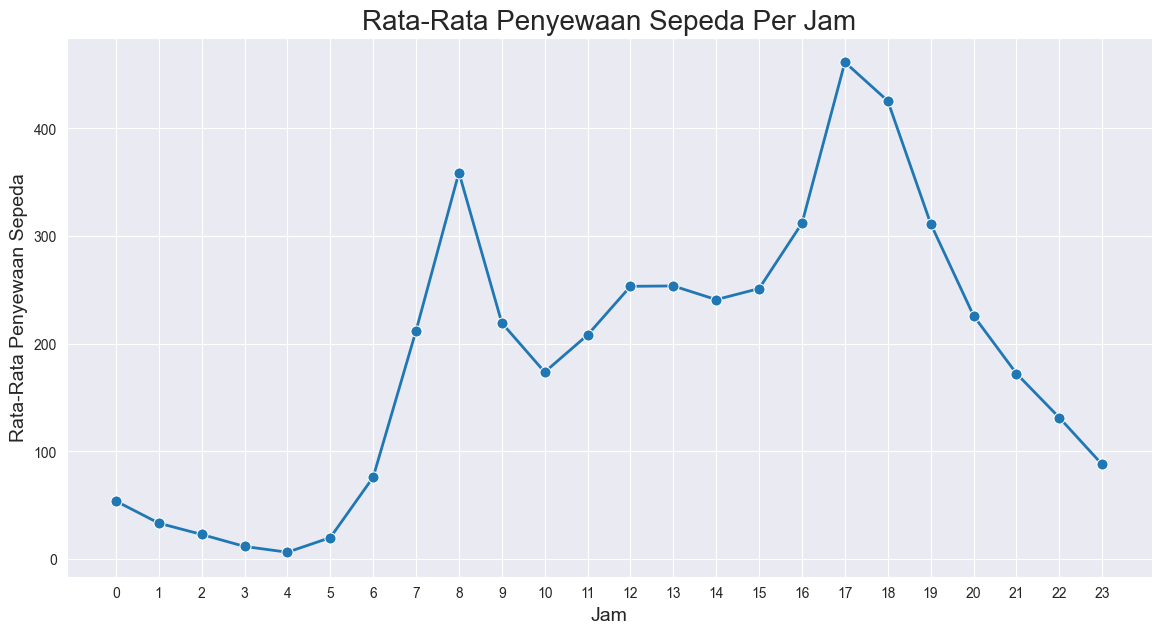

In [136]:
hourly_cnt_plt = hour_df.groupby(by= 'hr').cnt.mean()
line_plot(
    data=hourly_cnt_plt,
    title = 'Rata-Rata Penyewaan Sepeda Per Jam',
    x_label = 'Jam',
    y_label='Rata-Rata Penyewaan Sepeda',
)

### Bagaimana penyewaan sepeda tiap bulannya?

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\1230364900.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cnt_plt = day_df.groupby(by= 'mnth').cnt.mean()


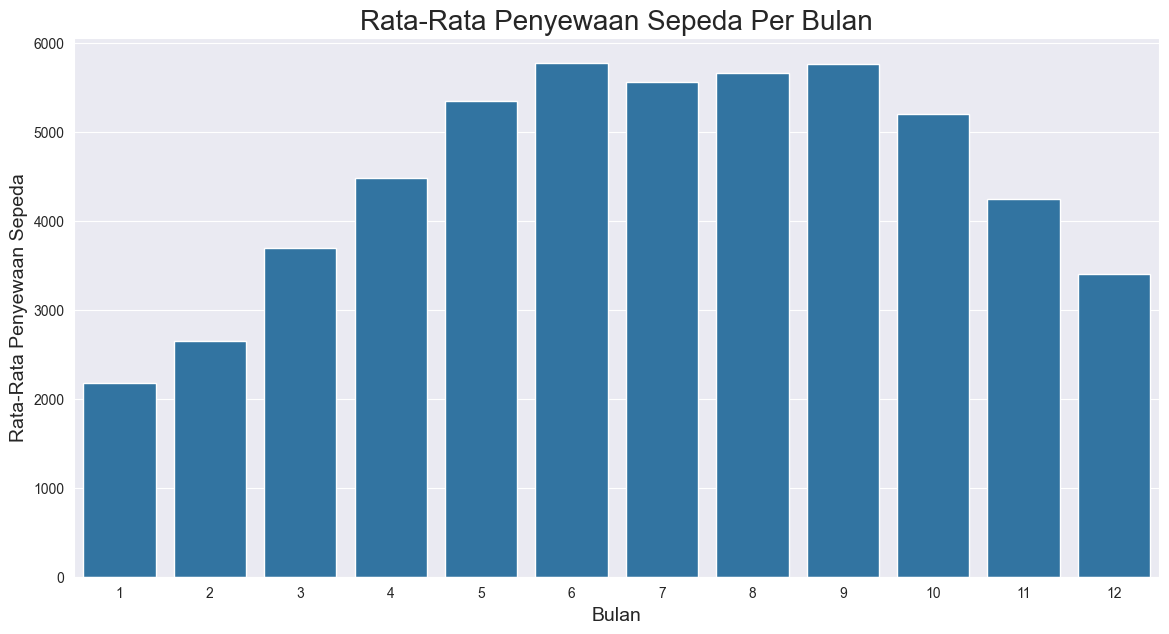

In [137]:
monthly_cnt_plt = day_df.groupby(by= 'mnth').cnt.mean()
bar_plot(
    data=monthly_cnt_plt,
    title = 'Rata-Rata Penyewaan Sepeda Per Bulan',
    x_label = 'Bulan',
    y_label='Rata-Rata Penyewaan Sepeda',
)

### Bagaimana pengaruh musim terhadap penyewaan sepeda?

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\2719538316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_cnt_plt = day_df.groupby(by= 'season').cnt.mean()


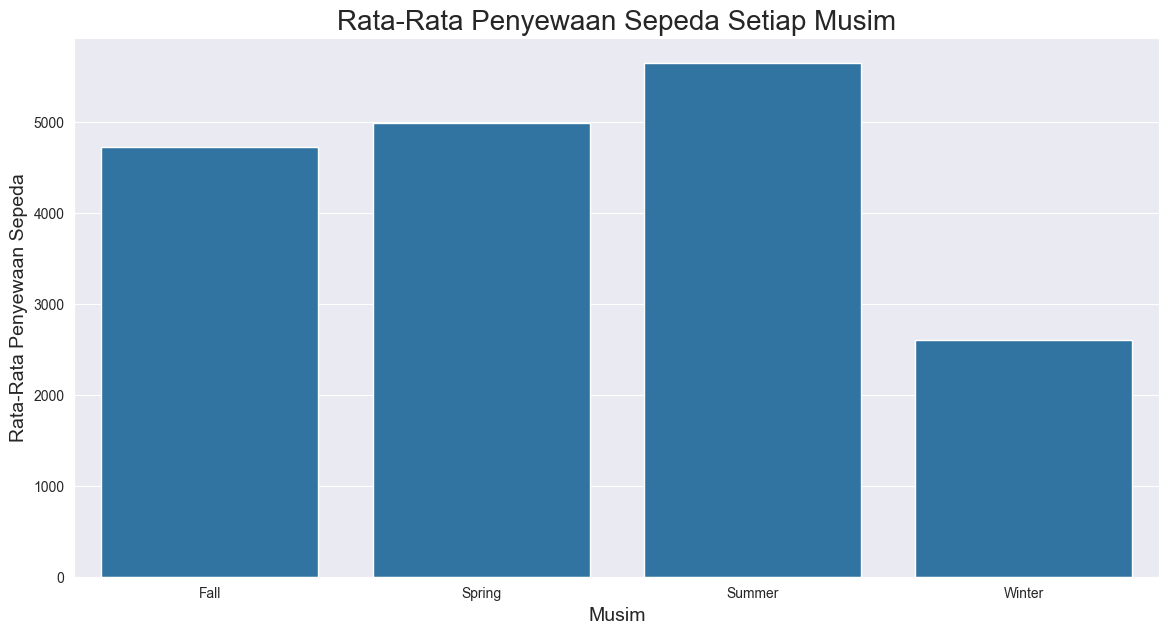

In [138]:
season_cnt_plt = day_df.groupby(by= 'season').cnt.mean()
bar_plot(
    data=season_cnt_plt,
    title = 'Rata-Rata Penyewaan Sepeda Setiap Musim',
    x_label = 'Musim',
    y_label='Rata-Rata Penyewaan Sepeda',
)

### Bagaimana pengaruh hari terhadap penyewaan sepeda?

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\1726641319.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_cnt_plt = day_df.groupby('weekday')['cnt'].mean()


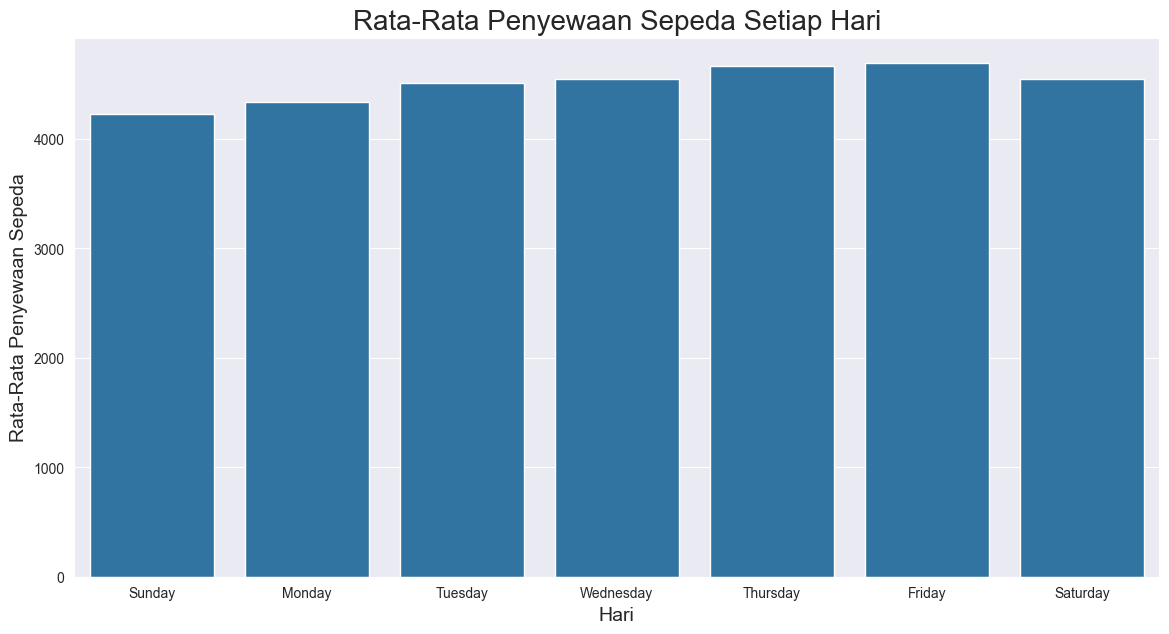

In [139]:
# Urutan hari yang diinginkan
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Groupby untuk menghitung rata-rata
day_cnt_plt = day_df.groupby('weekday')['cnt'].mean()

# Susun index sesuai urutan hari yang diinginkan
day_cnt_plt = day_cnt_plt.reindex(day_order)

# Plot
bar_plot(
    data=day_cnt_plt,
    title='Rata-Rata Penyewaan Sepeda Setiap Hari',
    x_label='Hari',
    y_label='Rata-Rata Penyewaan Sepeda'
)

### Bagaimana pengaruh hari kerja terhadap penyewaan sepeda?

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\1820498084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_cnt_plt = day_df.groupby(by= 'workingday').cnt.mean()


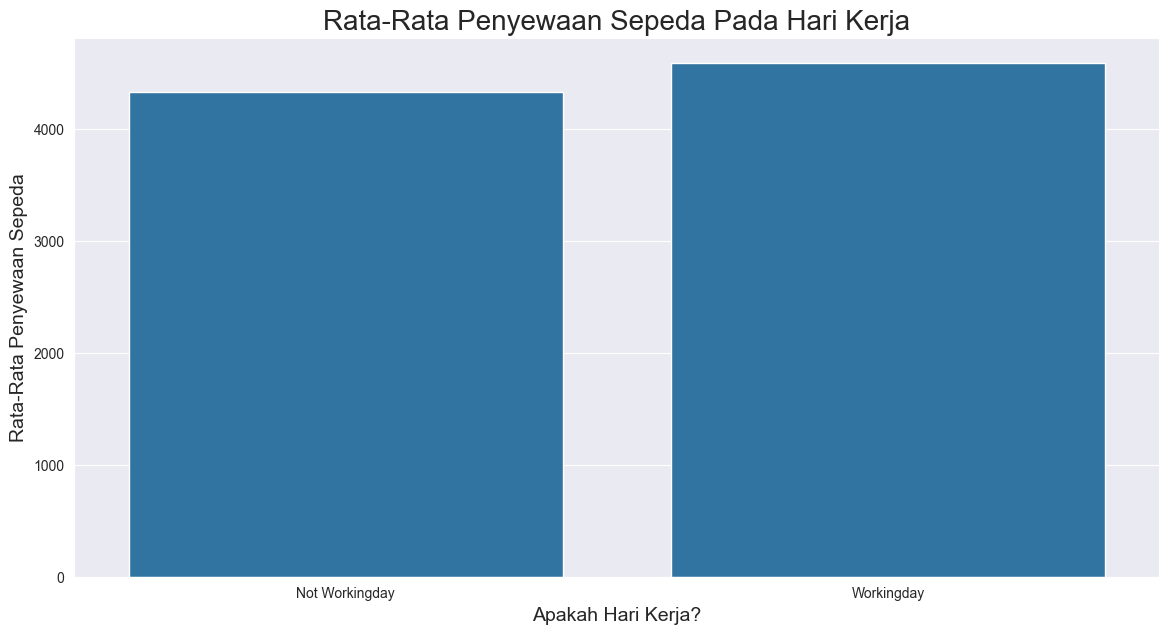

In [140]:
workday_cnt_plt = day_df.groupby(by= 'workingday').cnt.mean()
bar_plot(
    data=workday_cnt_plt,
    title = 'Rata-Rata Penyewaan Sepeda Pada Hari Kerja',
    x_label = 'Apakah Hari Kerja?',
    y_label='Rata-Rata Penyewaan Sepeda',
)

### Bagaimana pengaruh hari libur terhadap penyewaan sepeda?

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\2137795592.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_cnt_plt = day_df.groupby(by= 'holiday').cnt.mean()


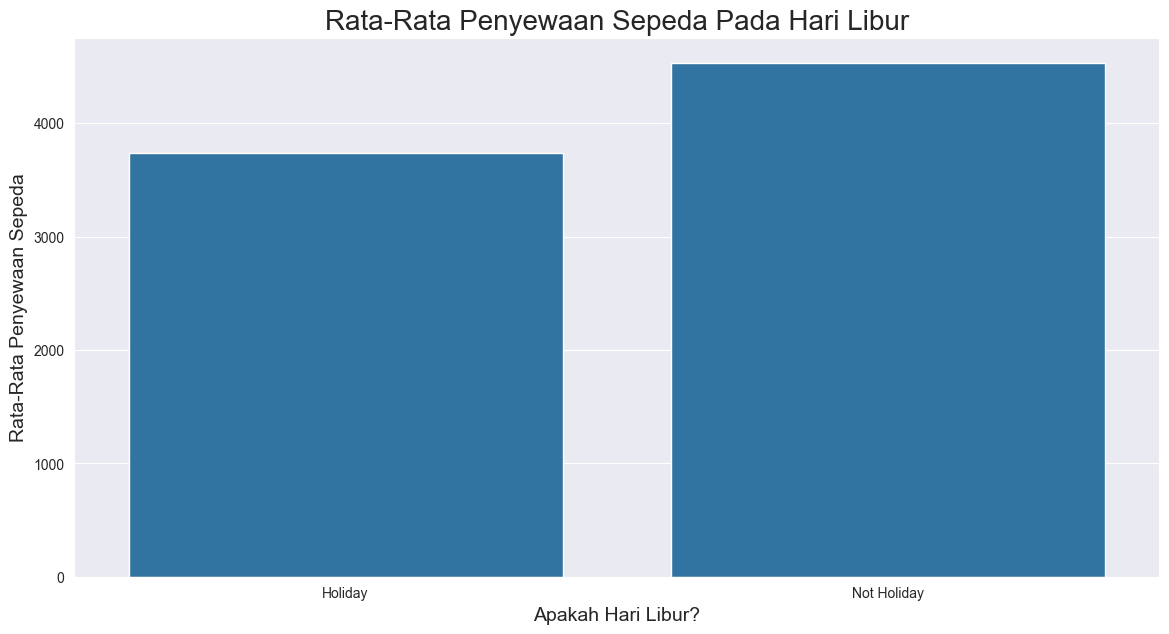

In [141]:
holiday_cnt_plt = day_df.groupby(by= 'holiday').cnt.mean()
bar_plot(
    data=holiday_cnt_plt,
    title = 'Rata-Rata Penyewaan Sepeda Pada Hari Libur',
    x_label = 'Apakah Hari Libur?',
    y_label='Rata-Rata Penyewaan Sepeda',
)

#### Insight dari tahap Visualization & Explanatory Data Analysis sekaligus menjawab pertanyaan bisnis
1. Bagaimana penyewaan sepeda setiap harinya?
    - Berdasarkan penyewaan sepeda per hari, rata-rata penyewaan dari hari senin sampai minggu, semuanya memiliki rata-rata yang hampir sama. Jadi, field atau variabel weekday hampir tidak memiliki pengaruh pada penyewaan sepeda.
\
&nbsp;

2. Bagaimana pengaruh hari kerja terhadap penyewaan sepeda?
    - Berdasarkan penyewaan sepeda pada hari kerja atau tidak, keduanya memiliki nilai rata-rata yang hampir sama. Ini berarti field atau variabel workingday hampir tidak memiliki pengaruh pada penyewaan sepeda.
\
&nbsp;

3. Bagaimana pengaruh hari libur terhadap penyewaan sepeda?
    - Namun berdasarkan hari libur atau tidak, penyewaan sepeda pada hari tidak libur memiliki rata-rata yang lebih tinggi. Jadi, hari libur dapat mempengaruhi jumlah penyewaan sepeda. Mungkin orang-orang banyak menyewa sepeda sebagai salah satu alat transportasinya di saat hari kerja. Dan saat libur, orang mungkin lebih memilih berpergian dengan alat transportasi lain, ataupun intensitas berpergian/ berpindah tempatnya rendah.
\
&nbsp;

4. Bagaimana penyewaan sepeda setiap musimnya?
    - Berdasarkan musim, rata-rata penyewaan sepeda yang paling tinggi saat musim panas (summer). Sedangkan lebih rendah sat musim dingin (winter). Jadi urutan dari tinggi ke rendah adalah musim panas, musim semi, musim gugur, musim dingin.
\
&nbsp;

5. Bagaimana penyewaan sepeda setiap bulannya?
    - Berdasarkan bulan, rata-rata penyewaan sepeda yang paling tinggi adalah di bulan 6. Lalu bulan 6 sampai bulan 10 memiliki nilai rata-rata yang hampir sama (5000an). Lalu bulan 11 sampai bulan 2 mulai mengalami penurunan penyewaan. Rata-rata penyewaan sepeda terendah adalah di bulan 1. Berarti terdapat pola jumlah penyewaan sepeda dalam setiap bulannya. Kemudian hal ini dikonfirmasi oleh field musim yang terjadi berdasarkan waktu bulan, di mana saat musim dingin, yaitu bulan 12 sampai bulan 3 sedikit penyewa sepeda. Lalu saat musim panas, yaitu bulan 5 sampai 8 banyak orang yang menyewa sepeda.
\
&nbsp;

6. Bagaimana penyewaan sepeda setiap jamnya?
    - Bila dilihat dari nilai rata-rata, mulai dari jam 23.00 - 06.00 rata-rata jumlah penyewa sepeda dibawah 100, yang artinya ini sedikit. Kemudian mulai dari jam 07.00 jumlah penyewa sepeda menaik, yaitu dengan rata-rata diatas 100.
    - Kemudian, berdasarkan nilai rata-ratanya, jam 17.00 adalah jam yang paling sering mengalami penyewaan sepeda, dengan urutan berikutnya yang mempunyai selisih sedikit adalah pada jam 18.00
\
&nbsp;

## Analisis Lanjutan (Opsional)

Berdasarkan hasil analisa sebelumnya, musim yang berkaitan dengan bulan, mempengaruhi rata-rata jumlah penyewaan sepeda. Seperti yang kita ketahui, musim juga mempengaruhi suhu rata-rata dalam musim tersebut. Saya ingin menganalisa lebih lanjut pengaruh unit lebih dalam dari musim, yaitu suhu, terhadap rata-rata jumlah penyewaan sepeda. Namun karena banyaknya nilai yang terdapat pada field temp, saya akan **mengelompokkan** nilai pada field temp menjadi tiga kategori, yaitu **Cool** (di bawah 0.3), **Normal** (0.31, dan **Hot** berdasarkan range nilai tertentu. Kemudian saya akan membuat dataframe baru yang bernama **complete_df**, yang memiliki field atau kolom **temp_cat** yang memiliki tipe data category dan menampung nilai kelompok suhu tadi.

In [142]:
# Definisikan fungsi untuk mengklasifikasikan suhu
def temp_cluster(temp):
    if temp < 0.3:
        return 'Cool'
    elif 0.3 <= temp < 0.6:
        return 'Normal'
    else:
        return 'Hot'

# Buat salinan day_df dan tambahkan kolom "temp_cat"
complete_df = day_df.copy()

# Terapkan fungsi temp_cluster ke kolom "temp"
complete_df['temp_cat'] = complete_df['temp'].apply(temp_cluster)

#Ubah kolom "temp_cat" menjadi tipe data kategori
complete_df['temp_cat'] = complete_df['temp_cat'].astype('category')

complete_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_str,temp_cat
0,1,2011-01-01,Winter,2011,1,Not Holiday,Saturday,Not Workingday,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Normal
1,2,2011-01-02,Winter,2011,1,Not Holiday,Sunday,Not Workingday,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter,Normal
2,3,2011-01-03,Winter,2011,1,Not Holiday,Monday,Workingday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter,Cool
3,4,2011-01-04,Winter,2011,1,Not Holiday,Tuesday,Workingday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter,Cool
4,5,2011-01-05,Winter,2011,1,Not Holiday,Wednesday,Workingday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter,Cool


In [143]:
complete_df.groupby(by='temp_cat').agg({
    "instant" : "nunique",
    "cnt" : ["max","min","mean","std"]
})

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\469560294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  complete_df.groupby(by='temp_cat').agg({


instant   cnt                                
         nunique   max   min         mean          std
temp_cat                                              
Cool         133  5686   431  2388.729323  1271.407560
Hot          255  8714  1115  5664.909804  1385.803654
Normal       343  8555    22  4461.883382  1792.609635

C:\Users\jo\AppData\Local\Temp\ipykernel_8652\939121917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cnt_plt = complete_df.groupby(by= 'temp_cat').cnt.mean()


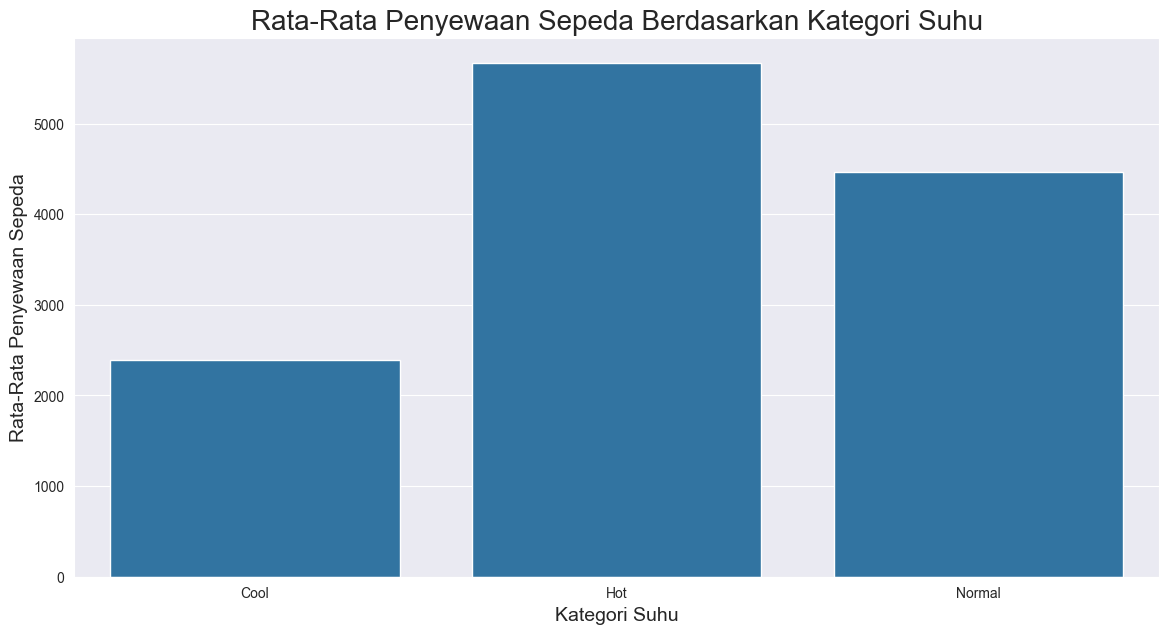

In [144]:
temp_cnt_plt = complete_df.groupby(by= 'temp_cat').cnt.mean()
bar_plot(
    data=temp_cnt_plt,
    title = 'Rata-Rata Penyewaan Sepeda Berdasarkan Kategori Suhu',
    x_label = 'Kategori Suhu',
    y_label='Rata-Rata Penyewaan Sepeda',
)

#### Insight Analisis Lanjutan
- Dapat dilihat bahwa suhu mempengaaruhi rata-rata jumlah penyewaan sepeda, di mana orang banyak menyewa sepeda saat suhu dalam kategori panas, kemudian dengan urutan selanjutnya yaitu suhu kategori normal, dan paling sedikit saat suhu kategori dingin.
- Berarti suhu mempunyai korelasi dengan musim, di mana tiap musim memiliki ciri khas kategori suhu, dan mempunyai korelasi dengan bulan, di mana dalam beberapa bulan tertentu memiliki ciri khas musimnya yang mempengaruhi rata-rata jumlah penyewaan sepeda

## Conclusion

1. Bagaimana penyewaan sepeda setiap harinya?
    - Berdasarkan penyewaan sepeda per hari, rata-rata penyewaan dari hari senin sampai minggu, semuanya memiliki rata-rata yang hampir sama. Jadi, field atau variabel weekday hampir tidak memiliki pengaruh pada penyewaan sepeda.
\
&nbsp;

2. Bagaimana pengaruh hari kerja terhadap penyewaan sepeda?
    - Berdasarkan penyewaan sepeda pada hari kerja atau tidak, keduanya memiliki nilai rata-rata yang hampir sama. Ini berarti field atau variabel workingday hampir tidak memiliki pengaruh pada penyewaan sepeda.
\
&nbsp;

3. Bagaimana pengaruh hari libur terhadap penyewaan sepeda?
    - Namun berdasarkan hari libur atau tidak, penyewaan sepeda pada hari tidak libur memiliki rata-rata yang lebih tinggi. Jadi, hari libur dapat mempengaruhi jumlah penyewaan sepeda. Sepertinya orang-orang banyak menyewa sepeda sebagai salah satu alat transportasinya di saat hari kerja. Dan saat libur, orang mungkin lebih memilih berpergian dengan alat transportasi lain, ataupun intensitas berpergian/ berpindah tempatnya rendah. Pemilik usaha sewa sepeda harus mempersiapkan persediaan sepeda lebih banyak pada hari kerja.
\
&nbsp;

4. Bagaimana penyewaan sepeda setiap bulannya?
    - Berdasarkan bulan, rata-rata penyewaan sepeda yang paling tinggi adalah di bulan 6. Lalu bulan 6 sampai bulan 10 memiliki nilai rata-rata yang hampir sama (5000an). Lalu bulan 11 sampai bulan 2 mulai mengalami penurunan penyewaan. Rata-rata penyewaan sepeda terendah adalah di bulan 1. Berarti terdapat pola jumlah penyewaan sepeda dalam setiap bulannya. Kemudian hal ini dikonfirmasi oleh field musim yang terjadi berdasarkan waktu bulan, di mana saat musim dingin, yaitu bulan 12 sampai bulan 3 sedikit penyewa sepeda. Lalu saat musim panas, yaitu bulan 5 sampai 8 banyak orang yang menyewa sepeda.
\
&nbsp;

5. Bagaimana penyewaan sepeda setiap musimnya?
    - Berdasarkan musim, rata-rata penyewaan sepeda yang paling tinggi saat musim panas (summer). Sedangkan lebih rendah sat musim dingin (winter). Jadi urutan dari tinggi ke rendah adalah musim panas, musim semi, musim gugur, musim dingin. Pemilik usaha sewa sepeda juga harus mempersiapkan persediaan sepeda lebih banyak pada musim panas. Musim juga berkorelasi dengan musim, di mana tiap musim memiliki ciri khas kategori suhu, dan mempunyai korelasi dengan bulan, di mana dalam beberapa bulan tertentu memiliki ciri khas musimnya yang mempengaruhi rata-rata jumlah penyewaan sepeda. Seperti pada musim panas (summer) yang terjadi pada bulan 6, yang dimana musim tersebut memiliki ciri khas suhu dengan kategori panas (hot), mempunyai rata-rata jumlah penyewaan sepeda yang tinggi
\
&nbsp;

6. Bagaimana penyewaan sepeda setiap jamnya?
    - Bila dilihat dari nilai rata-rata, mulai dari jam 23.00 - 06.00 rata-rata jumlah penyewa sepeda dibawah 100, yang artinya ini sedikit. Kemudian mulai dari jam 07.00 jumlah penyewa sepeda menaik, yaitu dengan rata-rata diatas 100.
    - Kemudian, berdasarkan nilai rata-ratanya, jam 17.00 adalah jam yang paling sering mengalami penyewaan sepeda, dengan urutan berikutnya yang mempunyai selisih sedikit adalah pada jam 18.00
\
&nbsp;

In [145]:
complete_df.to_csv("dashboard\main_data.csv", index=False)